In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import warnings
#warnings.filterwarnings(‘ignore’)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from pandas_datareader import data as pdr
!pip3 install yfinance
import yfinance as yf
!pip install fredapi
yf.pdr_override()
from fredapi import Fred

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=b081972633928a6227738e7158f3f07782747697a13a6c311d25d7072d271bbc
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


# Data Analysis

In [ ]:
stocks = ['AAPL','MSFT','INTC']
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2019,1,9)
stock_prices = yf.download(stocks,start=start,end = end, interval= '3mo') # We are using quaterly data.
stock_prices.head()

[*********************100%***********************]  3 of 3 completed


Adj Close             ...        Volume              
                 AAPL       INTC  ...          INTC          MSFT
Date                              ...                            
2010-01-01  29.062700  16.189905  ...  3.925473e+09  3.544531e+09
2010-02-03        NaN        NaN  ...           NaN           NaN
2010-02-16        NaN        NaN  ...           NaN           NaN
2010-04-01  31.106989  14.240126  ...  4.745037e+09  4.710971e+09
2010-05-05        NaN        NaN  ...           NaN           NaN

[5 rows x 18 columns]

In [ ]:
stock_prices=stock_prices['Adj Close']
stock_prices.dropna(inplace=True)
stock_prices.head(10)

,AAPL,INTC,MSFT
Date,,,
2010-01-01,29.062700,16.189905,22.927485
2010-04-01,31.106989,14.240126,18.095884
2010-07-01,35.091660,14.156242,19.346718
2010-10-01,39.891342,15.623785,22.166080
2011-01-01,43.100601,15.109674,20.288603
2011-04-01,41.512661,16.732658,20.898834
2011-07-01,47.158245,16.240023,20.137753
2011-10-01,50.086784,18.634745,21.136017
2012-01-01,74.146996,21.800579,26.463120


In [ ]:
# Accordingly, `mean` tells us that stock price of Apple is the highest among 3 companies and, not surprisingly,
# it has the most volatility(High Std dev) indicating that Apple may be the most risky stock.
stock_prices.describe()

,AAPL,INTC,MSFT
count,37.000000,37.000000,37.000000
mean,94.328986,26.994642,45.539768
std,47.305536,10.465013,26.820867
min,29.062700,14.156242,18.095884
25%,55.230373,17.836348,24.132721
50%,89.365730,26.315273,36.510292
75%,115.116539,32.966618,58.161533
max,219.732910,49.045139,111.174431


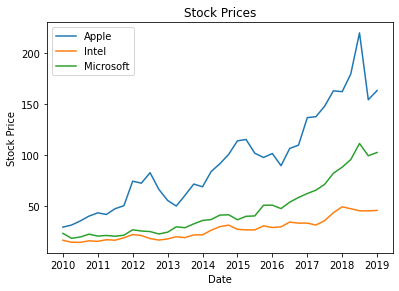

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(stock_prices.AAPL,label= 'Apple')
ax1.plot(stock_prices.INTC,label='Intel')
ax1.plot(stock_prices.MSFT,label='Microsoft')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price')
ax1.set_title('Stock Prices')
plt.legend()
plt.show()

In [ ]:
returns=stock_prices.pct_change() # Gives the daily returns dataframe after each quater
returns.dropna(inplace=True)
returns.head()

,AAPL,INTC,MSFT
Date,,,
2010-04-01,0.070341,-0.120432,-0.210734
2010-07-01,0.128096,-0.005891,0.069123
2010-10-01,0.136776,0.103668,0.145728
2011-01-01,0.080450,-0.032906,-0.084700
2011-04-01,-0.036843,0.107414,0.030078


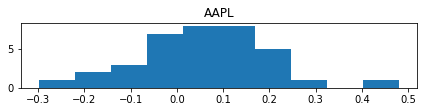

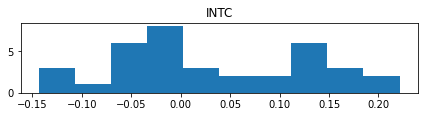

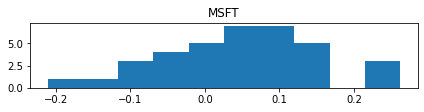

In [ ]:
k=1
for i in range(0, len(returns.columns)):
 plt.subplot(3, 1, k)
 plt.hist(returns[returns.columns[i]])
 plt.title('{}'.format(returns.columns[i]))
 k+=1
 plt.tight_layout()
 plt.show()
# These histograms are distribution of returns over the 10 year period. 
# We can see that their are outliers with both 40% return quaterly and -30% return for apple but in lesser volume. Expectation of almost 10percent.
# We can see that INTC is more spread out and varying interns of returns. 
# Microsoft is having majority of data towards right and is left skewed.

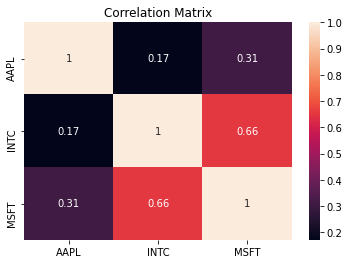

In [ ]:
# Lets compute correlation analysis Using Heatmap.
heat_corr=returns.corr()
sns.heatmap(heat_corr, annot=True)
plt.title('Correlation Matrix')
plt.show()
# Microsoft and Intel has .66 correlation which is resonable and other stocks are not very much correlated.

# Collecting Macroeconomic Variables.
    1) Quarterly GDP per capita growth
    2) Quarterly inflation growth 
    3) quarterly oil price growth.


In [ ]:
# We use FredApi (FRED data provided by the Federal Reserve Bank of St. Louis.)
fred = Fred(api_key = '4338b0ca0ecffaafebbd4d161aa8a0cb')

In [ ]:
# To find the best-fit risk free rate
fred.search('risk free')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
DGS10,DGS10,2020-08-04,2020-08-04,10-Year Treasury Constant Maturity Rate,1962-01-02,2020-07-31,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2020-08-03 15:23:01-05:00,96,For further information regarding treasury con...
GS10,GS10,2020-08-04,2020-08-04,10-Year Treasury Constant Maturity Rate,1953-04-01,2020-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2020-08-03 15:21:01-05:00,75,Averages of business days. For further informa...
WGS10YR,WGS10YR,2020-08-04,2020-08-04,10-Year Treasury Constant Maturity Rate,1962-01-05,2020-07-31,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2020-08-03 15:21:10-05:00,66,Averages of business days. For further informa...
DGS1,DGS1,2020-08-04,2020-08-04,1-Year Treasury Constant Maturity Rate,1962-01-02,2020-07-31,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2020-08-03 15:23:08-05:00,81,For further information regarding treasury con...
GS1,GS1,2020-08-04,2020-08-04,1-Year Treasury Constant Maturity Rate,1953-04-01,2020-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2020-08-03 15:22:37-05:00,57,Averages of business days. For further informa...
WGS1YR,WGS1YR,2020-08-04,2020-08-04,1-Year Treasury Constant Maturity Rate,1962-01-05,2020-07-31,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2020-08-03 15:22:34-05:00,57,Averages of business days. For further informa...
DGS5,DGS5,2020-08-04,2020-08-04,5-Year Treasury Constant Maturity Rate,1962-01-02,2020-07-31,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2020-08-03 15:22:22-05:00,77,For further information regarding treasury con...
GS5,GS5,2020-08-04,2020-08-04,5-Year Treasury Constant Maturity Rate,1953-04-01,2020-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2020-08-03 15:22:40-05:00,57,Averages of business days. For further informa...
WGS5YR,WGS5YR,2020-08-04,2020-08-04,5-Year Treasury Constant Maturity Rate,1962-01-05,2020-07-31,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2020-08-03 15:23:12-05:00,48,Averages of business days. For further informa...


In [ ]:
from datetime import datetime
# As a proxy of risk free rate 3-Month Treasury Constant Maturity Rate is used. 
# This rate is widely used in financial analysis as a proxy of risk free rate 
# because government-issued paper is theoretically considered as riskless.
risk_free=fred.get_series('GS3M')
risk_free = risk_free.loc['20100101':'20181201']
rf=risk_free/100

In [ ]:
rf.head(5)

2010-01-01    0.0006
2010-02-01    0.0011
2010-03-01    0.0015
2010-04-01    0.0016
2010-05-01    0.0016
dtype: float64

In [ ]:
# As we previously sampled quaterely, we need to convert the riskfree interest rate also quaterly
rf=rf.resample('Q').mean()*3

Text(0.5, 1.0, '3-Month Treasury Constant Maturity Rate')

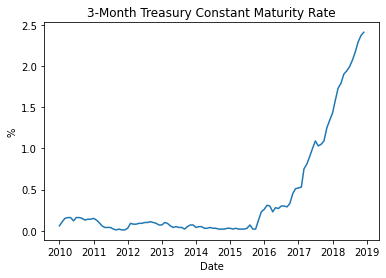

In [ ]:
plt.plot(risk_free)
plt.xlabel('Date')
plt.ylabel('%')
plt.title('3-Month Treasury Constant Maturity Rate')
# From plot we can observe that, 3-Month Treasury rate was rather stabile roughly during 2010–2015. 
# But from 2017, interest rate was started to raise sharply and reached at 2.5% towards the end of 2018.
# Therefore we obtained the risk-free return on quaterly basis from 2010 to 2018

In [ ]:
# GDP factor
gdp=fred.get_series('GDP')
gdp=gdp.loc['20100101':'20181201']
gdp.tail()

2017-10-01    19937.963
2018-01-01    20242.215
2018-04-01    20552.653
2018-07-01    20742.723
2018-10-01    20909.853
dtype: float64

In [ ]:
# Daily returns of GDP, which indicated the growth
gdp_growth=gdp.pct_change().dropna()

Text(0.5, 1.0, 'GDP Growth Rate, 2010–2018')

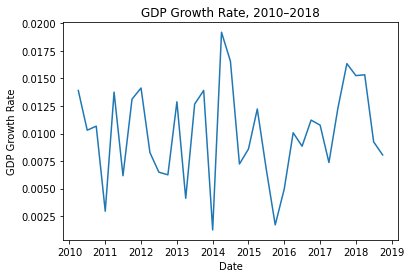

In [ ]:
# We can see that GDP growth oscillated between 0.01, indicating the growth is stable and rarely goes below 0.
plt.plot(gdp_growth)
plt.ylabel('GDP Growth Rate')
plt.xlabel('Date')
plt.title('GDP Growth Rate, 2010–2018')

In [ ]:
# Calculating Inflation 
fred.search('potential inflation')
inf=fred.get_series('CPIEALL')
inf=inf.loc['20100101':'20181201']
# From data and domain knowledge we know that inflation rate goes up at a moderate pace

In [ ]:
print(inf.head())
print(inf.tail())

2010-01-01    233.620
2010-02-01    233.758
2010-03-01    234.563
2010-04-01    234.932
2010-05-01    235.101
dtype: float64
2018-08-01    274.314
2018-09-01    274.534
2018-10-01    274.872
2018-11-01    274.317
2018-12-01    273.824
dtype: float64


In [ ]:
# For quaterly Sampling rate
inf_quarterly=inf.resample('Q').mean()
inf_growth=inf_quarterly.pct_change().dropna()
inf_growth.head()

2010-06-30    0.004433
2010-09-30    0.000959
2010-12-31    0.002327
2011-03-31    0.011944
2011-06-30    0.015014
Freq: Q-DEC, dtype: float64

Text(0.5, 1.0, 'Inflation Growth Rate, 2010–2019')

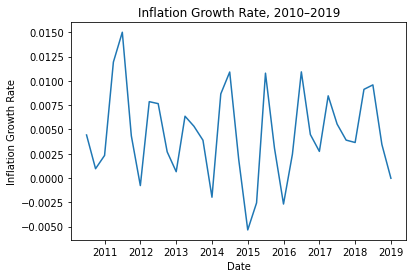

In [ ]:
# The assertion we made is true, that inflation growth is constant and oscilated every year.
plt.plot(inf_growth)
plt.ylabel('Inflation Growth Rate')
plt.xlabel('Date')
plt.title('Inflation Growth Rate, 2010–2019')

In [ ]:
# For importing Oil Price, we can use Quandl API
#!pip install quandl
from datetime import date
import quandl
quandl.ApiConfig.api_key = 'r9xspF46DGBv5sNXdtME'
# Importing our data
oil = quandl.get("ODA/POILBRE_USD", start_date="2009-12-01", end_date="2019-01-01")
# Resampling for monthly
oil_quarterly=oil.resample('Q').mean()

Text(0.5, 1.0, 'Oil Price from, 2010–2019')

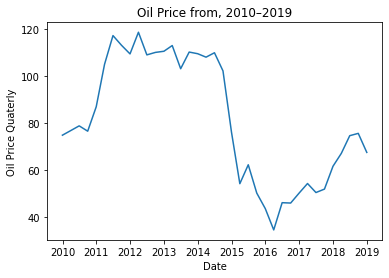

In [ ]:
plt.plot(oil_quarterly)
plt.ylabel('Oil Price Quaterly')
plt.xlabel('Date')
plt.title('Oil Price from, 2010–2019')
# Oil price shows considerable instability. Oil price, for instance, has its peak at 118 USD in 2012 but it plunged and 
# dropped to 34 USD in 2016 following the short-term restriction on oil supply. As is seen, there exists wild volatility 
# in the oil price in this study period.


In [ ]:
# Inorder to check the daily returns in Oil price.
oil_return=oil_quarterly.pct_change().dropna()
oil_return.head()

,Value
Date,
2010-03-31,0.026324
2010-06-30,0.026168
2010-09-30,-0.028821
2010-12-31,0.135982
2011-03-31,0.208562


Text(0.5, 1.0, 'Oil Quaterly Returns from, 2010–2019')

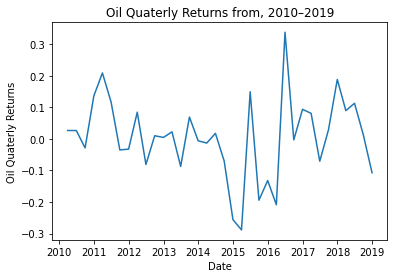

In [ ]:
# High volatility in oil price can be observed simply by looking at the oil return during 2010–2018.
plt.plot(oil_return)
plt.ylabel('Oil Quaterly Returns')
plt.xlabel('Date')
plt.title('Oil Quaterly Returns from, 2010–2019')
# The most striking observation is oil price dropped and increase by nearly 30% in mid-2015 and mid-2016, respectively.

# Data Cleaning for APT Implementation

In [ ]:
# Data Preparation to fit all data in one dataframe
returns=returns.reset_index() # Original Stock Portfolio Dataframe
returns.drop('Date',axis=1,inplace=True)

In [ ]:
# Manipulation on Risk Free Dataframe
rf=pd.DataFrame(rf)
rf=rf.reset_index() # Ignoring Index
rf.drop('index',axis=1,inplace=True) # Dropping Index Column
rf.columns=['rf']
returns['rf']=pd.DataFrame(rf) # Adding the riskfree return series to returns dataframe

In [ ]:
# We are subtracting the excess return ie risk free return if invested on govt currency for each stock.
stocks=['AAPL','INTC','MSFT']
for i in stocks:
 returns['excess_return_'+str(i)]=returns[i]-returns.rf # Adding the columns after subtracting risk free return

In [ ]:
returns.head(5)

,AAPL,INTC,MSFT,rf,excess_return_AAPL,excess_return_INTC,excess_return_MSFT
0,0.070341,-0.120432,-0.210734,0.0032,0.067141,-0.123632,-0.213934
1,0.128096,-0.005891,0.069123,0.0044,0.123696,-0.010291,0.064723
2,0.136776,0.103668,0.145728,0.0047,0.132076,0.098968,0.141028
3,0.080450,-0.032906,-0.084700,0.0041,0.076350,-0.037006,-0.088800
4,-0.036843,0.107414,0.030078,0.0038,-0.040643,0.103614,0.026278


In [ ]:
# We apply the same treatment for other macroeconomic variables as well.
gdp_growth=gdp_growth.reset_index()
inf_growth=inf_growth.reset_index()
oil_return=oil_return.reset_index()
gdp_growth.drop('index',axis=1,inplace=True)
inf_growth.drop('index',axis=1,inplace=True)
oil_return.drop('Date',axis=1,inplace=True)
gdp_growth.columns=["gdp_growth"]
inf_growth.columns=["inf_growth"]
oil_return.columns=["oil_return"]

In [ ]:
# Let us examine each of the stocks seperatly with macroeconomic variables
data1=pd.concat([gdp_growth, inf_growth,oil_return], axis=1)
data2=pd.concat([gdp_growth, inf_growth,oil_return], axis=1)
data3=pd.concat([gdp_growth, inf_growth,oil_return], axis=1)

In [ ]:
# Three different data which is labeled as “data1”,”data2", and “data3”. Macroeconomic variables are the same in all data.
# The only difference is the stocks, That is to say, “data1” includes excess return of Apple,
#  “data2” includes excess return of Intel, “data3” includes excess return of Microsoft.
data1['excess_return']=returns.excess_return_AAPL
data2['excess_return']=returns.excess_return_INTC
data3['excess_return']=returns.excess_return_MSFT

In [ ]:
# empirically test the validity of APT by simply using some main US macroeconomic variables.
# Lets see if we can fit an Regression line for the data
import statsmodels.regression.linear_model as smlr
models =[]
for i in (data1,data2,data3):
    formula =  "excess_return~ gdp_growth+inf_growth+oil_return"
    models.append(smlr.OLS.from_formula(formula, data = i).fit())  

In [ ]:
# The result shows the association between excess return of Apple and pre-defined macroeconomic variables. 
# Accordingly, the estimated coefficient of the model is not statistically significant indicating that 
# these macroeconomic variables do not account for the excess return of Apple. More specifically, 
# by looking at p-values, I conclude that the estimated coefficients of  inflation growth, and 
# oil return is not statistically significant at conventional levels.
# But GDP is having a part in prediction of AAPL stock Price
# To be interpret, one unit increase in gdp growth boosts excess return in apple by nearly 11.4 times.
models[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          excess_return   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.239
Date:                Tue, 04 Aug 2020   Prob (F-statistic):              0.312
Time:                        10:39:16   Log-Likelihood:                 19.151
No. Observations:                  35   AIC:                            -30.30
Df Residuals:                      31   BIC:                            -24.08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0578      0.065     -0.885      0.383      -0.191       0.075
gdp_growth    11.4415      5.968      1.917      0.064      -0.730      23.613
inf_growth    -2.0322      5.809     -0.350      0.729     -13.879       9.815
oil_return     0.0218      0.204      0.107      0.916      -0.395       0.439
==============================================================================
Omnibus:                        3.650   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.860
Skew:                          -0.164   Prob(JB):                        0.239
Kurtosis:                       4.362   Cond. No.                         257.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# This model presents the nexus between excess return of Intel and the same macroecomic variables provided below.
#  Differently from the Apple case, this analysis confirms that there is a statistically significant relationship between excess return
# of Intel and gdp growth of US at 10% level (p-value is 0.093). To be interpret, one unit increase in gdp growth boosts
# excess return on Intel by nearly 8.96. So, there is a positive relationship between gdp growth and excess return of Intel. 
# However, no relation is detected for the rest of the variables.
models[1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          excess_return   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     1.957
Date:                Tue, 04 Aug 2020   Prob (F-statistic):              0.141
Time:                        10:41:56   Log-Likelihood:                 33.522
No. Observations:                  35   AIC:                            -59.04
Df Residuals:                      31   BIC:                            -52.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0597      0.043     -1.377      0.178      -0.148       0.029
gdp_growth     8.9463      3.958      2.260      0.031       0.874      17.019
inf_growth    -1.6356      3.853     -0.425      0.674      -9.493       6.222
oil_return     0.1012      0.136      0.746      0.461      -0.175       0.378
==============================================================================
Omnibus:                        0.561   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.755   Jarque-Bera (JB):                0.636
Skew:                           0.033   Prob(JB):                        0.728
Kurtosis:                       2.343   Cond. No.                         257.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Microsoft is not having not much of influence on Stock price by macro economic factors.
models[2].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          excess_return   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.091
Method:                 Least Squares   F-statistic:                   0.05729
Date:                Tue, 04 Aug 2020   Prob (F-statistic):              0.982
Time:                        10:45:40   Log-Likelihood:                 29.177
No. Observations:                  35   AIC:                            -50.35
Df Residuals:                      31   BIC:                            -44.13
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0268      0.049      0.547      0.588      -0.073       0.127
gdp_growth     1.5134      4.481      0.338      0.738      -7.626      10.653
inf_growth    -1.0508      4.362     -0.241      0.811      -9.947       7.845
oil_return     0.0297      0.154      0.193      0.848      -0.284       0.343
==============================================================================
Omnibus:                        0.896   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.639   Jarque-Bera (JB):                0.206
Skew:                          -0.088   Prob(JB):                        0.902
Kurtosis:                       3.332   Cond. No.                         257.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""